# Artificial Neural Networks

Martin Kersner

Inspired by http://neuralnetworksanddeeplearning.com/ and https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py.

* stochastic gradient descent learning
* backpropagation
* forward pass
* backward pass

TODO Perceptron model explanation

In [1]:
from __future__ import division
import random
import numpy as np
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

TODO Image of network

In [2]:
# TODO MATRIX MULTIPLICATION EXAMPLE

In [3]:
# DEFINE AND INITIALIZE

# The first layer containing 2 neurons, the second layer 3 neurons, and the third layer 1 neuron.  
layers = [784, 30, 10]

# Altogether 3 layers.
num_layers = len(layers)

# The biases and weights for the network are initialized randomly, using a Gaussian distribution
# with mean 0, and variance 1. The first layer is assumed to be an input layer, and by convention we
# won't set any biases for those neurons.
biases  = [np.random.randn(y, 1) for y in layers[1:]]
weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]

In [4]:
# BIASES in layers
for b in biases:
    print(len(b))

30
10


In [5]:
# BIAS VALUES
print(biases)

[array([[-0.57638215],
       [ 0.31086646],
       [-0.86292257],
       [-0.23755443],
       [-1.23429457],
       [-0.38857867],
       [-2.33070083],
       [-0.4759963 ],
       [-1.34614802],
       [-0.44100436],
       [ 0.55879719],
       [-1.9124004 ],
       [ 1.56727543],
       [ 1.06954287],
       [ 0.75017501],
       [-0.30495949],
       [ 1.48441244],
       [ 0.79802304],
       [ 2.01701267],
       [-0.58086864],
       [-0.14563295],
       [-0.78379384],
       [ 0.36530474],
       [-0.54614387],
       [ 1.24306034],
       [-0.1819356 ],
       [-1.0019802 ],
       [-1.23241118],
       [ 0.79359284],
       [ 0.52480352]]), array([[-0.65995859],
       [-1.11134198],
       [ 0.23953856],
       [-0.84953094],
       [-0.15681935],
       [ 0.4928564 ],
       [ 0.30387174],
       [ 0.13503362],
       [ 0.75441775],
       [ 0.23883715]])]


In [6]:
# WEIGHTS in layers
for w in weights:
    print(w.shape)

(30, 784)
(10, 30)


In [7]:
# WEIGHTS
print(weights)

[array([[-0.70873339,  0.79972877, -0.277934  , ..., -1.02703309,
         1.40570815, -1.38229551],
       [ 0.71202082, -0.80546574, -1.34864041, ...,  0.80121089,
         0.33570409, -1.24426723],
       [-1.30212011,  0.65461373, -0.40289739, ..., -0.24427389,
        -1.36219906, -0.44610559],
       ..., 
       [ 0.70695862, -0.04081286, -1.07950297, ..., -0.49066113,
        -0.09257511,  0.60203764],
       [-1.65822583, -0.3655542 , -0.24079386, ..., -1.42881582,
         0.95416513, -0.47482783],
       [-0.69009247,  0.36031847, -0.19381884, ..., -2.48057116,
        -0.51639008, -0.09768601]]), array([[-1.01839228,  0.7152047 , -0.62651818,  0.88802729, -0.79297578,
        -0.84268128,  0.27068069, -1.16187978, -0.02055262, -0.95361283,
        -0.01844792, -1.54400412, -0.81982477, -0.06944194, -0.55226338,
         0.28897439, -1.07060299, -1.55626386, -2.31077166, -0.6576706 ,
         1.2958493 ,  0.94912291,  0.1051055 ,  1.76765985, -1.69589888,
        -0.49303562

## Sigmoid activation function
* introduces non-linearity

<img src="files/sigmoid.png">

In [8]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [9]:
def feedforward(biases, weights, a):
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

### Backpropagation

### Derivation of sigmoid

In [10]:
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)
        
def backprop(biases, weights, x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    
    # feedforward
    activation = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    
    for b, w in zip(biases, weights):
        z = np.dot(w, activation)+b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
        
    # backward pass
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    # Note that the variable l in the loop below is used a little
    # differently to the notation in Chapter 2 of the book.  Here,
    # l = 1 means the last layer of neurons, l = 2 is the
    # second-last layer, and so on.  It's a renumbering of the
    # scheme in the book, used here to take advantage of the fact
    # that Python can use negative indices in lists.
    num_layers = len(weights)+1
    for l in xrange(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(weights[-l+1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    return (nabla_b, nabla_w)

## Minibatch
* TODO minibatch explanation
* TOOD update update explanation
* TODO eta explanation

In [11]:
# eta - learning rate
def update_mini_batch(biases, weights, mini_batch, eta):
    def update(v, nv, eta, mini_batch_size):
        return v-(eta/mini_batch_size)*nv
    
    def cumulate(nabla_v, delta_nabla_v):
        return [nv+dnv for nv, dnv in zip(nabla_v, delta_nabla_v)]
        
    nabla_b = zeros_like(biases)
    nabla_w = zeros_like(weights)
    
    # !! TODO explanation
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = backprop(biases, weights, x, y)
        nabla_b = cumulate(nabla_b, delta_nabla_b)
        nabla_w = cumulate(nabla_w, delta_nabla_w)
    
    mini_batch_size = len(mini_batch)
    
    weights = [update(w, nw, eta, mini_batch_size)
               for w, nw in zip(weights, nabla_w)]
    
    biases = [update(b, nb, eta, mini_batch_size)
              for b, nb in zip(biases, nabla_b)]
    
    return biases, weights

* Stochastic gradient descent
* Epoch

In [20]:
def SGD(biases, weights, training_data, epochs, mini_batch_size, eta, test_data=None):
    """Train the neural network using mini-batch stochastic
    gradient descent.  The ``training_data`` is a list of tuples
    ``(x, y)`` representing the training inputs and the desired
    outputs.  The other non-optional parameters are
    self-explanatory.  If ``test_data`` is provided then the
    network will be evaluated against the test data after each
    epoch, and partial progress printed out.  This is useful for
    tracking progress, but slows things down substantially."""
    
    def evaluate(biases, weights, data, training_data_evalution=False):
        if training_data_evalution:
            test_results = [(np.argmax(feedforward(biases, weights, x)), np.argmax(y)) for (x, y) in data]
        else:
            test_results = [(np.argmax(feedforward(biases, weights, x)), y) for (x, y) in data]

        return sum(int(x == y) for (x, y) in test_results)
    
    if test_data:
        n_test = len(test_data)

    n = len(training_data)
    test_acc_lst = []
    train_acc_lst = []
    
    for j in xrange(epochs):
        random.shuffle(training_data)
        
        mini_batches = [training_data[k:k+mini_batch_size] for k in xrange(0, n, mini_batch_size)]
        
        for mini_batch in mini_batches:
            biases, weights = update_mini_batch(biases, weights, mini_batch, eta)
            
        if test_data:
            test_acc = evaluate(biases, weights, test_data)
            test_acc_lst.append(test_acc/n_test)
            
            train_acc = evaluate(biases, weights, training_data, training_data_evalution=True)
            train_acc_lst.append(train_acc/n)
            
            print("Epoch {0}: {1} / {2}".format(j, test_acc, n_test))
        else:
            print("Epoch {0} complete".format(j))
            
    return biases, weights, train_acc_lst, test_acc_lst

In [13]:
# def evaluate(biases, weights, test_data):
#     """Return the number of test inputs for which the neural
#     network outputs the correct result. Note that the neural
#     network's output is assumed to be the index of whichever
#     neuron in the final layer has the highest activation."""
    
#     test_results = [(np.argmax(feedforward(biases, weights, x)), y) for (x, y) in test_data]
#     return sum(int(x == y) for (x, y) in test_results)

## MNIST dataset
* http://yann.lecun.com/exdb/mnist/
* 28 by 28 pixels
* grayscale images

In [14]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

6


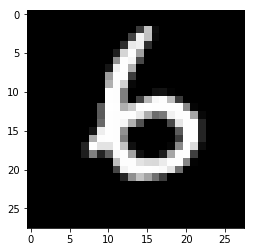

In [15]:
# Display random image and label from training data.

def random_data_sample(data):
    ri = random.randint(0, len(data)-1)
    X_rand = data[ri][0]
    y_rand = data[ri][1]
    
    return X_rand, y_rand

def display_random_digit(data):
    X_rand, y_rand = random_data_sample(data)

    rand_img = X_rand.reshape((28, 28))
    plt.figure()
    plt.imshow(rand_img, cmap='gray')
    
    print(np.argmax(y_rand))
    
display_random_digit(training_data)

## One hot encoding

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]
7


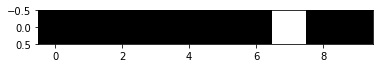

In [16]:
def display_random_one_hot_encoding(data):
    _, y_rand = random_data_sample(data)
    print(y_rand)
    plt.figure()
    plt.imshow(y_rand.T, cmap='gray')
    print(np.argmax(y_rand))
    
display_random_one_hot_encoding(training_data)

TODO display random numbers
TODO graph

In [21]:
# Training
epochs=3
mini_batch_size=10
eta=3.0

biases_final, weights_final, train_acc, test_acc = SGD(biases, weights, training_data, epochs, mini_batch_size, eta, test_data=validation_data)

# Plo
# plt.plot(range(len(test_acc)), test_acc)

Epoch 0: 9134 / 10000
Epoch 1: 9277 / 10000
Epoch 2: 9356 / 10000


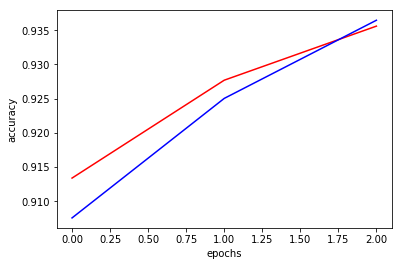

In [26]:
plt.plot(range(len(test_acc)), test_acc, c="r")
plt.plot(range(len(train_acc)), train_acc, c="b")
plt.ylabel("accuracy")
plt.xlabel("epochs")

## Keras